In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

%run ../setup_behaviour.py
myProject = Project(name=projectName,dataPath=dataPath)

data path: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter
Project name: autopi_behavior_2021
dataPath: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021
Project name: autopi_behavior_2021
dataPath: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021


In [3]:
######################################################
### load the dfTrials from the 3 mice
#######################################################

fn =  myProject.dataPath+"/results/trialsDF.csv"
df = pd.read_csv(fn)

In [4]:
###################
## The first two animals that we ran 
#######################
fanSessions = ["mn3246-03032021-1635","mn1173-03032021-1823","mn3246-04032021-1613","mn1173-04032021-1725","mn1173-05032021-1646","mn3246-05032021-1534"]
dfFan = df[df.sessionName.isin(fanSessions)]
dfFan["fan"] = (dfFan.trialNo>=35) & (dfFan.trialNo<=70)

In [5]:
dfFan.shape, dfFan.columns


((553, 125),
 Index(['Unnamed: 0', 'sessionName', 'name', 'valid', 'trialNo', 'startTime',
        'endTime', 'startTimeWS', 'endTimeWS', 'duration',
        ...
        'homingPeriNoLever_meanVectorDirectionOri',
        'homingPeriNoLever_meanSpeed', 'homingPeriNoLever_mvAngularDistance',
        'homingPeriNoLever_mvAngularSpeed',
        'homingPeriNoLever_oriAngularDistance',
        'homingPeriNoLever_oriAngularSpeed',
        'homingPeriNoLever_medianMVDeviationToTarget',
        'homingPeriNoLever_medianHDDeviationToTarget', 'subject', 'fan'],
       dtype='object', length=125))

In [6]:
######################################################
### load the dfTrials from the new sessions I created from another 4 mice
#######################################################
fn =  myProject.dataPath+"/results/trialsFanexp0423.csv"
dfFan23 = pd.read_csv(fn)

In [7]:
dfFan23.shape

## get the common columns
cols= dfFan23.columns.intersection(dfFan.columns)
len(cols)

124

In [8]:
###################################
## load the sessions in the projects
####################################
fn =  myProject.dataPath+"/results/fanExpSessionList"
print("Reading " + fn)
sessionNames = pd.read_csv(fn) # this will be a pandas dataframe
myProject.createSessionList(sessionNameList=sessionNames.sessionName.to_list())

Reading /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021/results/fanExpSessionList


In [9]:
#########################
## get the session names
########################

dfFan23['fan']= (dfFan23.trialNo>=35)& (dfFan23.trialNo<=70)

# add both the data from 2020 and 2023 together 

In [10]:
len(dfFan.columns) , len(dfFan23.columns)

(125, 154)

In [11]:
dfFan20= dfFan.filter(['subject','light','fan','angularErrorHomingPeri',  "homingPeri_meanSpeed", "searchArenaNoLever_meanSpeed",
                       "homingPeriNoLever_medianHDDeviationToTarget", "homingPeriNoLever_medianMVDeviationToTarget"])
dfFan23=dfFan23.filter(['subject','light','fan','angularErrorHomingPeri',  "homingPeri_meanSpeed", "searchArenaNoLever_meanSpeed",
                        "homingPeriNoLever_medianHDDeviationToTarget", "homingPeriNoLever_medianMVDeviationToTarget"])


In [12]:
dfFanAll= pd.concat([dfFan20,dfFan23],axis=0)
dfFanAll

,subject,light,fan,angularErrorHomingPeri,homingPeri_meanSpeed,searchArenaNoLever_meanSpeed,homingPeriNoLever_medianHDDeviationToTarget,homingPeriNoLever_medianMVDeviationToTarget
4234,mn3246,light,False,3.599323,41.217414,63.458866,15.656577,11.780791
4235,mn3246,light,False,1.034134,34.332758,70.157472,57.116188,45.092669
4236,mn3246,light,False,6.051474,51.386113,44.764810,13.181956,17.332008
4237,mn3246,light,False,5.497835,NaN,56.678231,18.482387,11.843683
4238,mn3246,light,False,3.917998,57.684093,68.969389,13.048510,9.368332
...,...,...,...,...,...,...,...,...
1187,mn10698,dark,False,21.384239,35.894780,33.040954,30.755520,46.362320
1188,mn10698,light,False,2.983948,61.581297,68.395837,2.271126,2.865890
1189,mn10698,dark,False,30.073858,45.827664,64.603671,51.126004,65.677513
1190,mn10698,light,False,5.512195,59.498946,62.560868,12.620332,9.549441


In [13]:
dfFanAll[(dfFanAll.light=='light')&(dfFanAll.fan==False)].shape, dfFanAll[(dfFanAll.light=='light')&(dfFanAll.fan==True)].shape

((603, 8), (325, 8))

In [14]:
dfFanAll[(dfFanAll.light=='dark')&(dfFanAll.fan==False)].shape ,dfFanAll[(dfFanAll.light=='dark')&(dfFanAll.fan==True)].shape

((494, 8), (323, 8))

In [15]:
dfMouse= dfFanAll.groupby(['subject', 'light', 'fan']).mean().reset_index()
dfMouse

,subject,light,fan,angularErrorHomingPeri,homingPeri_meanSpeed,searchArenaNoLever_meanSpeed,homingPeriNoLever_medianHDDeviationToTarget,homingPeriNoLever_medianMVDeviationToTarget
0,mn10599,dark,False,84.071964,38.026120,37.788064,101.024157,99.423091
1,mn10599,dark,True,74.410842,39.889720,35.820780,95.245753,91.265761
2,mn10599,light,False,10.835132,48.053193,58.199665,19.785603,18.708256
3,mn10599,light,True,5.431357,50.750124,63.961386,19.032179,16.006549
4,mn10600,dark,False,39.385293,34.565858,35.860016,68.594143,66.257675
5,mn10600,dark,True,40.885632,35.915584,39.785728,67.098212,65.899966
6,mn10600,light,False,17.773114,45.520530,55.325097,28.547320,27.615081
7,mn10600,light,True,18.634098,50.849941,56.807633,33.482876,35.110137
8,mn10601,dark,False,30.651951,36.531479,33.510062,56.571285,54.076537
9,mn10601,dark,True,24.387046,44.388375,34.637744,60.478443,53.747895


/tmp/ipykernel_233813/407463692.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[xi,yi]= plt.subplot(gs[xi,yi])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_233813/407463692.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[xi,yi]= plt.subplot(gs[xi,yi])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10.0 1.0 angularErrorHomingPeri
10.0 1.0 angularErrorHomingPeri
4.0 0.21875 homingPeri_meanSpeed


/tmp/ipykernel_233813/407463692.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[xi,yi]= plt.subplot(gs[xi,yi])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_233813/407463692.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[xi,yi]= plt.subplot(gs[xi,yi])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_233813/407463692.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.r

7.0 0.5625 homingPeri_meanSpeed
1.0 0.0625 searchArenaNoLever_meanSpeed
7.0 0.5625 searchArenaNoLever_meanSpeed



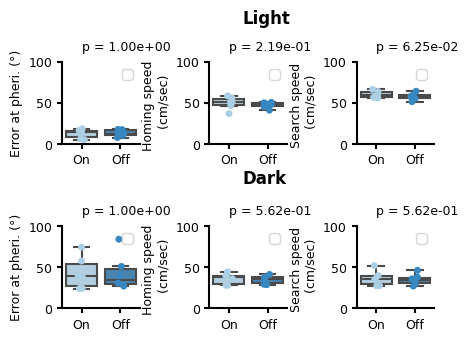

In [17]:
from scipy.stats import wilcoxon

nRow=2 ## 4
nCol=3##2
xPerPlot=1.6#2.45
yPerPlot=1.6#2.4#3# 3.45
#2.45


#fig, axes = plt.subplots(nRow,nCol,figsize=(nCol*sizePerCol,nRow*yPerPlot))
fig, ax = plt.subplots(nRow,nCol,figsize=(nCol*xPerPlot,nRow*yPerPlot))
gs = gridspec.GridSpec(2, 3, figure=fig)
plt.subplots_adjust(wspace=0.9,hspace=1)

# create a dictionary that hold the variables that varies across graphs
#d = {"variable" : ["angularErrorHomingPeri", "homingPeriNoLever_medianMVDeviationToTarget", "homingPeri_meanSpeed", "searchArenaNoLever_meanSpeed"], 
d = {"variable" : ["angularErrorHomingPeri", "homingPeri_meanSpeed", "searchArenaNoLever_meanSpeed"], 
    "xMin" : [0,0,0,0],
     "xMax" : [180,180,80,90],
     "xStep" : [10,10,5,5],
     "xTicksStep" : [45, 45, 20,10],
     "xLabel": ["Error at periphery (deg.)",
               "Heading error (deg.)",
               "Homing speed (cm/sec)",
               "Search speed (cm/sec)"]}


for j, var in enumerate(d["variable"]):
    for i, lc in enumerate(["light","dark"]):

        xi=i%nRow###xi=j%nRow # index for subplot
        yi=j+(i//nRow)*2##yi=i+(j//nRow)*2 # index for subplot

        # get the data 

        dataFanOn = dfMouse[var][(dfMouse.light==lc) & (dfMouse.fan==True)].dropna()
        dataFanOff= dfMouse[var][(dfMouse.light==lc) & (dfMouse.fan==False)].dropna()
        
        onshape= dataFanOn.shape[0] ## length of each df
        offshape=dataFanOff.shape[0]
        lim= min(dataFanOn.shape[0], dataFanOff.shape[0]) ## 
        
        dfvar= pd.DataFrame({'FanOn': dataFanOn.iloc[:lim].squeeze().tolist() , 'FanOff':dataFanOff.iloc[:lim].squeeze().tolist()})
        ylables=['Error at pheri. (°)',  'Homing speed \n (cm/sec)', 'Search speed \n (cm/sec)']
        
        ### get teh stats
        ## stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
        stat,p_value= wilcoxon(x=dataFanOn, y =dataFanOff, alternative= 'two-sided')
        
        ###
        print(stat,p_value, var)
             
        ax[xi,yi]= plt.subplot(gs[xi,yi])
        ax[xi,yi]= sns.boxplot(data=dfvar, showfliers=False, palette='Blues')
        ax[xi,yi]= sns.stripplot(data=dfvar, palette='Blues', size=5)
        ax[xi,yi].tick_params(axis='x', labelsize=9)
        ax[xi,yi].set_xticklabels(['On','Off'], fontsize= 9)
        ax[xi,yi].set_ylim(0,100)
        ax[xi,yi].tick_params(axis='y', labelsize=9)
        ax[xi,yi].set_ylabel(ylables[j],fontsize=9)
        ax[xi,yi].spines['top'].set_visible(False)
        ax[xi,yi].spines['right'].set_visible(False)
        ax[xi,yi].spines['left'].set_linewidth(1.5)
        ax[xi,yi].spines['bottom'].set_linewidth(1.5)
        ax[xi,yi].xaxis.set_tick_params(width=1.5)
        ax[xi,yi].yaxis.set_tick_params(width=1.5)
        ax[xi,yi].legend()
        
        #### print the p value 
        
        ax[xi,yi].text(0.25,1.14,"p = {:.02e}".format(p_value),transform=ax[xi,yi].transAxes, fontsize= 9)
        #ax[xi,yi].violinplot(dataset=dfvar)
        
ax[0,0].text(0.50,1.0, 'Light', style='normal',fontsize=12, weight="bold", transform=plt.gcf().transFigure)
ax[0,0].text(0.50,0.50, 'Dark', style='normal',fontsize=12, weight="bold", transform=plt.gcf().transFigure)

#~fileName = "/home/maryam/Desktop/Ca1_revision/ReviewerOne/FanExp/ErrorPeri_23.pdf"
fileName = dataPath+"/results/Ca1_revision__ReviewerOne__FanExp__ErrorPeri_23.pdf"
#print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=400)

/tmp/ipykernel_233813/2134390870.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0]= plt.subplot(gs[0])
/tmp/ipykernel_233813/2134390870.py:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[1]= plt.subplot(gs[1])


number of light-on: 286 567
number of dark-on: 108 147
0.04028679109163989


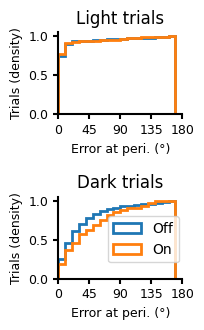

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#plt.style.use("seaborn")
al=0.6

nRow=2 ## 4
nCol=1##2
xPerPlot=1.6#2.45
yPerPlot=1.6#2.4#3# 3.45


fig, axes = plt.subplots(nRow,nCol,figsize=(nCol*xPerPlot,nRow*yPerPlot))
gs = gridspec.GridSpec(2, 1, figure=fig)
plt.subplots_adjust(wspace=0.8,hspace=1)


var = "angularErrorHomingPeri"
lc= "light"
dataFanOn = dfFanAll[var][(dfFanAll.light==lc) & (dfFanAll.fan==True)].dropna()
dataFanOff = dfFanAll[var][(dfFanAll.light==lc) & (dfFanAll.fan==False)].dropna()



axes[0]= plt.subplot(gs[0])
axes[0].set_title("{} trials".format(lc.capitalize()))
axes[0].hist(dataFanOff,label = "Air flow Off",bins=np.arange(0,180,10),color= sns.color_palette()[0],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2) 
axes[0].hist(dataFanOn,label = "Air flow On",bins=np.arange(0,180,10), color = sns.color_palette()[1],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2) 

axes[0].set_xlabel("Error at peri. (°)", fontsize=9)
axes[0].set_ylabel("Trials (density)", fontsize= 9)
axes[0].set_xlim(0,180)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(1.5)
axes[0].spines['bottom'].set_linewidth(1.5)
axes[0].xaxis.set_tick_params(width=1.5)
axes[0].yaxis.set_tick_params(width=1.5)
axes[0].set(xticks=np.linspace(0, 180, num=5)) # <--- set the ticks first
axes[0].set_xticklabels(['0','45','90','135','180'])        
axes[0].tick_params(axis='x', labelsize=9)
axes[0].tick_params(axis='y', labelsize=9)
#axes[0].plot([0,0],[180,1])
#axes[0].legend(loc=(0.4,0.2))  
stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
#axes[0].text(0.52,0.65,"p = {:.02e}".format(p_value),transform=axes.transAxes)
#text(0.52,0.55,"n = {} {}".format(len(dataFanOn),len(dataFanOff)),transform=axes.transAxes)
print('number of light-on:', len(dataFanOn), len(dataFanOff))

var = "angularErrorHomingPeri"
lc= "dark"
dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)].dropna()
dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)].dropna()


axes[1]= plt.subplot(gs[1])
axes[1].set_title("{} trials".format(lc.capitalize()))
axes[1].hist(dataFanOff,label = "Off",bins=np.arange(0,180,10),color= sns.color_palette()[0],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2) 
axes[1].hist(dataFanOn,label = "On",bins=np.arange(0,180,10), color = sns.color_palette()[1],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2) 

axes[1].set_xlabel("Error at peri. (°)", fontsize=9)
axes[1].set_ylabel("Trials (density)", fontsize= 9)
axes[1].set_xlim(0,180)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(1.5)
axes[1].spines['bottom'].set_linewidth(1.5)
axes[1].xaxis.set_tick_params(width=1.5)
axes[1].yaxis.set_tick_params(width=1.5)
axes[1].set(xticks=np.linspace(0, 180, num=5)) # <--- set the ticks first
axes[1].set_xticklabels(['0','45','90','135','180'])        
axes[1].tick_params(axis='x', labelsize=9)
axes[1].tick_params(axis='y', labelsize=9)
print('number of dark-on:', len(dataFanOn), len(dataFanOff))

axes[1].legend(loc=(0.4,0.2))  
stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
print(p_value)


In [20]:
var = "angularErrorHomingPeri"
lc= "light"
dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)].dropna()
dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)].dropna()

stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
p_value , dataFanOn.shape, dataFanOff.shape

(0.5170193052600434, (100,), (182,))

In [21]:
 wilcoxon(dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)], y =dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)] )

WilcoxonResult(statistic=nan, pvalue=nan)

## Statistics

We need to show that ...
* Homing accuracy is better during light than dark trials
* Homing accuracy during dark trials is better than chance levels

In [22]:
from scipy import stats

def printResults(myList):
    print("light vs dark")
    print("n light: {}, dark: {}".format(len(myList[0]),len(myList[1])))
    print("median light:{:.3}, dark: {:.3}".format(np.median(myList[0]),np.median(myList[1])))
    print(stats.mannwhitneyu(x=myList[0], y =myList[1]))
    print("")

print("****ANGULAR ERROR AT PERIPHER****")    
myList = [dfFanAll.angularErrorHomingPeri[(dfFanAll.light=="light")],
          dfFanAll.angularErrorHomingPeri[dfFanAll.light=="dark"]]
printResults(myList)    
    
print("****MEAN HOMING ERROR DURING THE HOMING PATH ****")
myList = [dfFanAll.homingPeriNoLever_medianHDDeviationToTarget[(dfFanAll.light=="light") & 
                                                         (~dfFanAll.homingPeriNoLever_medianHDDeviationToTarget.isna())] ,
          dfFanAll.homingPeriNoLever_medianHDDeviationToTarget[(dfFanAll.light=="dark") & 
                                                         (~dfFanAll.homingPeriNoLever_medianHDDeviationToTarget.isna())]]
printResults(myList)



****ANGULAR ERROR AT PERIPHER****
light vs dark
n light: 928, dark: 817
median light:nan, dark: nan
MannwhitneyuResult(statistic=nan, pvalue=nan)

****MEAN HOMING ERROR DURING THE HOMING PATH ****
light vs dark
n light: 824, dark: 665
median light:13.5, dark: 55.3
MannwhitneyuResult(statistic=93699.0, pvalue=6.793028751373607e-106)



In [23]:
print("****** ERROR AT PERIPHERY HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)")
x = dfFanAll.angularErrorHomingPeri[(dfFanAll.light=="dark")&(dfFanAll.fan== True) & (~dfFanAll.angularErrorHomingPeri.isna())]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))


print("****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)")
#x = dfFanAll.homingPeriNoLever_medianMVDeviationToTarget[(dfFanAll.light=="dark") & 
 #(~dfFanAll.homingPeriNoLever_medianMVDeviationToTarget.isna())]
x= dfFanAll.homingPeriNoLever_medianMVDeviationToTarget[(dfFanAll.light=="dark")&(dfFanAll.fan== True)& (~dfFanAll.homingPeriNoLever_medianMVDeviationToTarget.isna())]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))

print("#############################")
print("#########Dark Trials#########")
print("#############################")

print("****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN Light TRIALS (CHANCE LEVELS)")
x = dfFanAll.angularErrorHomingPeri[(dfFanAll.light=="light")&(dfFanAll.fan== True) & (~dfFanAll.angularErrorHomingPeri.isna())]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))


print("****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)")
#x = dfFanAll.homingPeriNoLever_medianMVDeviationToTarget[(dfFanAll.light=="dark") & 
 #(~dfFanAll.homingPeriNoLever_medianMVDeviationToTarget.isna())]
x= dfFanAll.homingPeriNoLever_medianMVDeviationToTarget[(dfFanAll.light=="light")&(dfFanAll.fan== True)& (~dfFanAll.homingPeriNoLever_medianMVDeviationToTarget.isna())]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))


****** ERROR AT PERIPHERY HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)
n dark: 279
WilcoxonResult(statistic=3775.0, pvalue=1.6159361253016302e-31)
****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)
n dark: 261
WilcoxonResult(statistic=4985.0, pvalue=2.2632969450819825e-18)
#############################
#########Dark Trials#########
#############################
****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN Light TRIALS (CHANCE LEVELS)
n dark: 286
WilcoxonResult(statistic=280.0, pvalue=2.213232085563049e-47)
****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)
n dark: 273
WilcoxonResult(statistic=151.0, pvalue=2.633185570426356e-45)


In [24]:
x= dfFanAll.angularErrorHomingPeri[(dfFanAll.light=="dark") & 
                                                         (~dfFanAll.angularErrorHomingPeri.isna())&(dfFanAll.fan==True)]

y= dfFanAll.angularErrorHomingPeri[(dfFanAll.light=="light") & 
                                                         (~dfFanAll.angularErrorHomingPeri.isna())&(dfFanAll.fan==True)]

stats,p_value = stats.mannwhitneyu(x, y )
stats,p_value

(63915.0, 3.3481391671609627e-35)